# Lending Club Case Study

##### This case study is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

##### Borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

##### To analyse this we have the complete loan data for all loans issued through the time period 2007 to 2011 and its Data Dictionary. 

### 1. Import required libraries

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Read data

In [162]:
# Read Data dictionary
DataDict = pd.read_excel("Data_Dictionary.xlsx")
DataDict.shape

(117, 2)

In [163]:
# Read Loan data
LoanDf = pd.read_csv("loan.csv", low_memory=False)
LoanDf.shape

(39717, 111)

##### Displaying first five records

In [164]:
LoanDf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##### Get the information about each columns of the dataframe

In [165]:
LoanDf.info(verbose=True,show_counts=True)

# Observation
# We see that there are many columns with complete null values like "tot_coll_amt", "tot_cur_bal" etc
# We also see that there are three types of columns
# 1. Demographic variables like "emp_length", "annual_inc" etc
# 2. Loan characteristics variables like "int_rate", "loan_status" etc
# 3. Customer behavior variables like "total_acc", "total_pymnt" etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### 3. Data cleaning

##### Find columns which has only null values and drop them

In [166]:
col_with_no_val = list(LoanDf.columns[LoanDf.isnull().all()])
print("Number of columns which has no values = ",len(col_with_no_val))
print("Columns with Null values \n",col_with_no_val)

LoanDf.drop(columns=col_with_no_val, inplace=True)
print(LoanDf.shape)

Number of columns which has no values =  54
Columns with Null values 
 ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_c

##### Find the percentage of null values in each column

In [167]:
LoanDf.isna().sum() / LoanDf.shape[0] * 100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


##### Find columns with more than 90% null values and drop them

In [168]:
col_with_90_per_no_val = list(LoanDf.columns[LoanDf.isnull().sum() / len(LoanDf) * 100 > 90])
print(DataDict[DataDict["LoanStatNew"].isin(col_with_90_per_no_val)])

LoanDf.drop(columns=col_with_90_per_no_val, inplace=True)
print(LoanDf.shape)

               LoanStatNew                                        Description
52  mths_since_last_record  The number of months since the last public rec...
58            next_pymnt_d                        Next scheduled payment date
(39717, 55)


##### Out of the remaining columns few columns are not relevant for our analysis since these variables are not available at the time of loan application and hence this won't help in predicting whether a loan will be default or not.
##### Following are such columns
>  delinq_2yrs\
earliest_cr_line\
inq_last_6mths\
open_acc\
pub_rec\
revol_bal\
revol_util\
total_acc\
out_prncp\
out_prncp_inv\
total_pymnt\
total_pymnt_inv\
total_rec_prncp\
total_rec_int\
total_rec_late_fee\
recoveries\
collection_recovery_fee\
last_pymnt_d\
last_pymnt_amnt\
last_credit_pull_d\
application_type\


In [169]:
LoanDf.drop(["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"],axis = 1, inplace=True)
LoanDf.shape

(39717, 34)

##### Drop additional columns which do not add value to our analysis

In [170]:
# Column "pymnt_plan"
LoanDf["pymnt_plan"].value_counts()

# It has only one value i.e "n". Hence it can be dropped
LoanDf.drop(columns="pymnt_plan", inplace=True)
LoanDf.shape

(39717, 33)

In [171]:
# Column "url"
LoanDf["url"].head()

# It does not have any valuable information for our analysis. Hence can be dropped
LoanDf.drop(columns="url", inplace=True)
LoanDf.shape

(39717, 32)

In [172]:
# Column "collections_12_mths_ex_med"
LoanDf["collections_12_mths_ex_med"].value_counts()

# It has only one value i.e "0". Hence it can be dropped
LoanDf.drop(columns="collections_12_mths_ex_med", inplace=True)
LoanDf.shape

(39717, 31)

In [173]:
# Column "acc_now_delinq"
LoanDf["acc_now_delinq"].value_counts()

# It has only one value i.e "0". Hence it can be dropped
LoanDf.drop(columns="acc_now_delinq", inplace=True)
LoanDf.shape

(39717, 30)

In [174]:
# Column "chargeoff_within_12_mths"
LoanDf["chargeoff_within_12_mths"].value_counts()

# It has only one value i.e "0". Hence it can be dropped
LoanDf.drop(columns="chargeoff_within_12_mths", inplace=True)
LoanDf.shape

(39717, 29)

In [175]:
# Column "delinq_amnt"
LoanDf["delinq_amnt"].value_counts()

# It has only value "0". Hence it can be dropped
LoanDf.drop(columns="delinq_amnt", inplace=True)
LoanDf.shape

(39717, 28)

In [176]:
# Column "tax_liens"
LoanDf["tax_liens"].value_counts()

# It has only one value i.e "0". Hence it can be dropped
LoanDf.drop(columns="tax_liens", inplace=True)
LoanDf.shape

(39717, 27)

##### There are few columns which we won't be using for our analysis here
> id\
member_id\
desc\
title\
zip_code\
title\
emp_title

In [177]:
LoanDf.drop(["desc", "title", "zip_code","initial_list_status","emp_title"],axis = 1, inplace=True)

##### Fill partial missing values using business judgement

In [178]:
# Determine which all columns have Null values
LoanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   member_id               39717 non-null  int64  
 2   loan_amnt               39717 non-null  int64  
 3   funded_amnt             39717 non-null  int64  
 4   funded_amnt_inv         39717 non-null  float64
 5   term                    39717 non-null  object 
 6   int_rate                39717 non-null  object 
 7   installment             39717 non-null  float64
 8   grade                   39717 non-null  object 
 9   sub_grade               39717 non-null  object 
 10  emp_length              38642 non-null  object 
 11  home_ownership          39717 non-null  object 
 12  annual_inc              39717 non-null  float64
 13  verification_status     39717 non-null  object 
 14  issue_d                 39717 non-null

In [179]:
# Find number of empty values in column "emp_length"
LoanDf["emp_length"].isnull().sum()

1075

In [180]:
# Find values in in column "emp_length"
LoanDf["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [181]:
# Our assumption of emp_length being Null is that may be these borrowers are unemployed.
# Hence we will be replacing the Nulls with zero years
LoanDf["emp_length"].fillna("0 years",inplace=True)
LoanDf["emp_length"].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [182]:
# Find number of empty values in column "pub_rec_bankruptcies"
LoanDf["pub_rec_bankruptcies"].isnull().sum()

697

In [183]:
# Find values in in column "pub_rec_bankruptcies"
LoanDf["pub_rec_bankruptcies"].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [184]:
# Majority of values is "0". Hence we will be replacing the Nulls with "0"
LoanDf["pub_rec_bankruptcies"].fillna(0,inplace=True)
LoanDf["pub_rec_bankruptcies"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pub_rec_bankruptcies, dtype: float64

##### Convert incorrect data types of columns

In [185]:
# Convert the column "term" to int by removing the suffix "months"
LoanDf["term"] = LoanDf.term.apply(lambda x: x.rstrip("months")).astype("int")
LoanDf["term"].value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [186]:
# Convert the column "int_rate" to float by removing the suffix "%""
LoanDf["int_rate"] = LoanDf.int_rate.apply(lambda x: x.rstrip("%")).astype("float")
LoanDf["int_rate"].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [187]:
# Convert the column "emp_length" to int by removing the suffix "+ years" and prefix "<"
LoanDf["emp_length"] = LoanDf["emp_length"].apply(lambda x: x.rstrip("+ years").lstrip("<")).astype("int")
LoanDf["emp_length"].describe()

count    39717.000000
mean         4.954226
std          3.461960
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [188]:
# sub grade column has values like B1,B2.. / A1, A2.. etc from this the alphabets can be 
# removed as we have another column grade which determines that
LoanDf["sub_grade"] = LoanDf["sub_grade"].apply(lambda x: x[1])

### Remove outliers
##### Columns under consideration
>int_rate\
annual_inc\
loan_amnt\
funded_amnt\
funded_amnt_inv

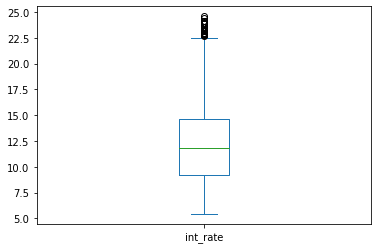

(39717, 22)

In [189]:
# int_rate column has some outliers this may influence our calculations during analysis hence removing
LoanDf["int_rate"].plot.box()
plt.show()
LoanDf.shape

In [190]:
IQR = LoanDf["int_rate"].quantile(0.75) - LoanDf["int_rate"].quantile(0.25)
max = LoanDf["int_rate"].quantile(0.75) + 1.5 * IQR
print("Max:",max)
LoanDf = LoanDf[LoanDf["int_rate"]<=max]
LoanDf.shape

Max: 22.6


(39639, 22)

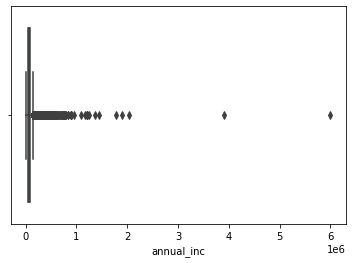

(39639, 22)

In [191]:
# annual_inc column has some outliers this may influence our calculations during analysis hence removing
sns.boxplot(LoanDf.annual_inc)
plt.show()
LoanDf.shape

In [192]:
IQR = LoanDf["annual_inc"].quantile(0.75) - LoanDf["annual_inc"].quantile(0.25)
max = LoanDf["annual_inc"].quantile(0.75) + 1.5 * IQR
print("Max:",max)
LoanDf = LoanDf[LoanDf["annual_inc"]<=max]
LoanDf.shape

Max: 144520.0


(37738, 22)

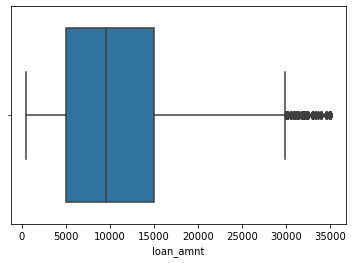

(37738, 22)

In [193]:
# loan_amnt column has some outliers this may influence our calculations during analysis hence removing
sns.boxplot(LoanDf.loan_amnt)
plt.show()
LoanDf.shape

In [194]:
IQR = LoanDf["loan_amnt"].quantile(0.75) - LoanDf["loan_amnt"].quantile(0.25)
max = LoanDf["loan_amnt"].quantile(0.75) + 1.5 * IQR
print("Max:",max)
LoanDf = LoanDf[LoanDf["loan_amnt"]<=max]
LoanDf.shape

Max: 29925.0


(36845, 22)

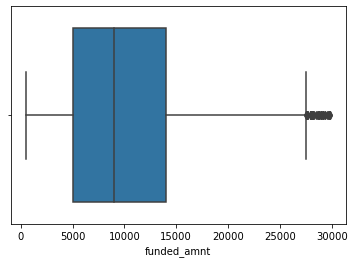

(36845, 22)

In [195]:
# funded_amnt column has some outliers this may influence our calculations during analysis hence removing
sns.boxplot(LoanDf.funded_amnt)
plt.show()
LoanDf.shape

In [196]:
IQR = LoanDf["funded_amnt"].quantile(0.75) - LoanDf["funded_amnt"].quantile(0.25)
max = LoanDf["funded_amnt"].quantile(0.75) + 1.5 * IQR
print("Max:",max)
LoanDf = LoanDf[LoanDf["funded_amnt"]<=max]
LoanDf.shape

Max: 27500.0


(36684, 22)

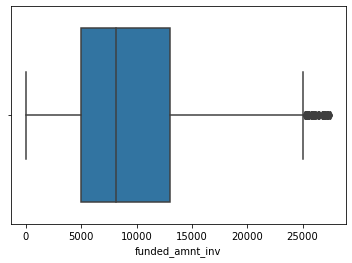

(36684, 22)

In [197]:
# funded_amnt_inv column has some outliers this may influence our calculations during analysis hence removing
sns.boxplot(LoanDf.funded_amnt_inv)
plt.show()
LoanDf.shape

In [198]:
IQR = LoanDf["funded_amnt_inv"].quantile(0.75) - LoanDf["funded_amnt_inv"].quantile(0.25)
max = LoanDf["funded_amnt_inv"].quantile(0.75) + 1.5 * IQR
print("Max:",max)
LoanDf = LoanDf[LoanDf["funded_amnt_inv"]<=max]
LoanDf.shape

Max: 25037.5


(36563, 22)

### Derived Metrics

##### Type driven

In [199]:
# Column "issue_d" is a date column which can be splitted into month and year
LoanDf["issue_d"] = pd.to_datetime(LoanDf["issue_d"],format="%b-%y")
LoanDf["issue_m"] = LoanDf['issue_d'].dt.month_name().str[:3]
LoanDf["issue_y"] = LoanDf['issue_d'].dt.year

LoanDf[["issue_d","issue_m","issue_y"]].head()

,issue_d,issue_m,issue_y
0,2011-12-01,Dec,2011
1,2011-12-01,Dec,2011
2,2011-12-01,Dec,2011
3,2011-12-01,Dec,2011
4,2011-12-01,Dec,2011


##### Data driven

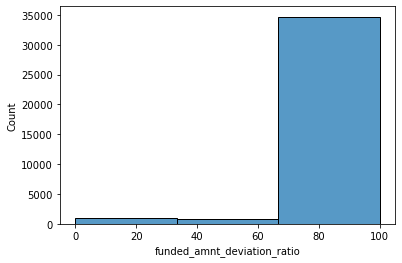

In [200]:
# funded_amnt_inv is the funded amount by the investors and funded_amnt is the approved loan amount 
# we could add a new column funded_amnt_deviation_ratio to determined the % of amount granted by investors 
# to funded amount approved

LoanDf["funded_amnt_deviation_ratio"] = LoanDf.apply(lambda x: (x["funded_amnt_inv"]/x["funded_amnt"]*100), axis = 1).round(2)
sns.histplot(LoanDf["funded_amnt_deviation_ratio"], bins= 3)
plt.show()

### Binning
##### For some of the quantitative variables in order to help us analyse them it's better to bin to make them categorical, this will give us more information. The columns considered for that are:
> annual_inc\
funded_amnt_inv

In [261]:
# annual_inc
LoanDf["annual_inc"].describe()

count     35641.000000
mean      60160.653938
std       27629.530204
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75600.000000
max      144500.000000
Name: annual_inc, dtype: float64

In [263]:
bins = [4000, 16000, 30000, 50000, 80000, 100000, 144500] # randoms bins are created w.r.t the distribution 
LoanDf['annual_inc_binned'] = pd.cut(LoanDf['annual_inc'], bins)
LoanDf['annual_inc_binned']

0          (16000, 30000]
1          (16000, 30000]
2           (4000, 16000]
3          (30000, 50000]
5          (30000, 50000]
               ...       
39711      (50000, 80000]
39712    (100000, 144500]
39713      (16000, 30000]
39714     (80000, 100000]
39716      (16000, 30000]
Name: annual_inc_binned, Length: 35641, dtype: category
Categories (6, interval[int64, right]): [(4000, 16000] < (16000, 30000] < (30000, 50000] < (50000, 80000] < (80000, 100000] < (100000, 144500]]

In [264]:
# funded_amnt_inv
LoanDf["funded_amnt_inv"].describe()

count    35641.000000
mean      9309.503475
std       5836.716073
min          0.000000
25%       4950.000000
50%       8000.000000
75%      12750.000000
max      25000.000000
Name: funded_amnt_inv, dtype: float64

In [265]:
bins = [0, 4000, 8000, 12000, 16000, 20000, 25000] # randoms bins are created w.r.t the distribution 
LoanDf['funded_amnt_inv_binned'] = pd.cut(LoanDf['funded_amnt_inv'], bins)
LoanDf['funded_amnt_inv_binned']

0         (4000, 8000]
1            (0, 4000]
2            (0, 4000]
3        (8000, 12000]
5         (4000, 8000]
             ...      
39711        (0, 4000]
39712        (0, 4000]
39713        (0, 4000]
39714        (0, 4000]
39716        (0, 4000]
Name: funded_amnt_inv_binned, Length: 35641, dtype: category
Categories (6, interval[int64, right]): [(0, 4000] < (4000, 8000] < (8000, 12000] < (12000, 16000] < (16000, 20000] < (20000, 25000]]

### 4. Sanity Check

In [266]:
# Funded amount or Funded amount investment should not be greater than Loan amount

LoanDf[(LoanDf["funded_amnt"] > LoanDf["loan_amnt"]) | (LoanDf["funded_amnt_inv"] > LoanDf["loan_amnt"])]

# Observation
# There are no such records

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,mths_since_last_delinq,policy_code,pub_rec_bankruptcies,issue_m,issue_y,funded_amnt_deviation_ratio,annual_inc_binned,funded_amnt_inv_binned


In [267]:
# Interest rate should not have any negative, zero or extremely high values

LoanDf["int_rate"].describe()

# Observation
# The min interest rate is 5.42% and max interest rate is 24.59 which looks legitimate

count    35641.000000
mean        11.765691
std          3.580988
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.480000
Name: int_rate, dtype: float64

In [268]:
# Installment should not be greater than loan amount

LoanDf[LoanDf["installment"] > LoanDf["loan_amnt"]]

# Observation
# There are no such records

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,mths_since_last_delinq,policy_code,pub_rec_bankruptcies,issue_m,issue_y,funded_amnt_deviation_ratio,annual_inc_binned,funded_amnt_inv_binned


### DataFrame structure

In [269]:
LoanDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35641 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           35641 non-null  int64         
 1   member_id                    35641 non-null  int64         
 2   loan_amnt                    35641 non-null  int64         
 3   funded_amnt                  35641 non-null  int64         
 4   funded_amnt_inv              35641 non-null  float64       
 5   term                         35641 non-null  int64         
 6   int_rate                     35641 non-null  float64       
 7   installment                  35641 non-null  float64       
 8   grade                        35641 non-null  object        
 9   sub_grade                    35641 non-null  object        
 10  emp_length                   35641 non-null  int64         
 11  home_ownership               35641 non-nu

### Listing different types of columns

In [272]:
#categorical varibles with type object(string)
print("\033[1m","Categorical variables\n","\033[0m")
for i,j in enumerate(LoanDf.select_dtypes(include=['object','category']).columns):
    print(i+1,"-",j)

 Categorical variables
 
1 - grade
2 - sub_grade
3 - home_ownership
4 - verification_status
5 - loan_status
6 - purpose
7 - addr_state
8 - issue_m
9 - annual_inc_binned
10 - funded_amnt_inv_binned


In [273]:
#Quantitative variable with type int/float
print("\033[1m","Quantitative variables\n","\033[0m")
for i,j in enumerate(LoanDf.select_dtypes(include=['int64','float64']).columns):
    print(i+1,"-",j)

 Quantitative variables
 
1 - id
2 - member_id
3 - loan_amnt
4 - funded_amnt
5 - funded_amnt_inv
6 - term
7 - int_rate
8 - installment
9 - emp_length
10 - annual_inc
11 - dti
12 - mths_since_last_delinq
13 - policy_code
14 - pub_rec_bankruptcies
15 - issue_y
16 - funded_amnt_deviation_ratio


In [274]:
#Datetime variable
print("\033[1m","DateTime variables\n","\033[0m")
for i,j in enumerate(LoanDf.select_dtypes(include=['datetime64']).columns):
    print(i+1,"-",j)

 DateTime variables
 
1 - issue_d


### 5. Univariate Analysis

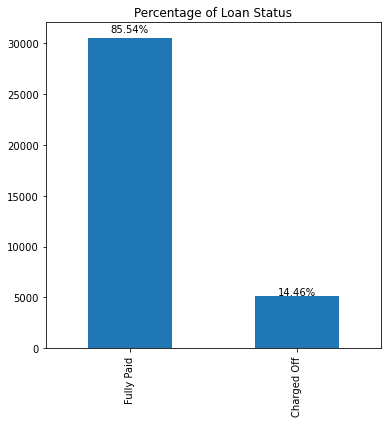

In [275]:
# Determine the percentage of loans that have been charged off

plt.title("Percentage of Loan Status")
ax = LoanDf["loan_status"].value_counts().plot.bar(figsize=[6,6])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(height/len(LoanDf["loan_status"])*100, 2)}%', xy=(x + width/2, y + height*1.02), ha='center')
plt.show()

# Observation
# 14.17% of loans have been charged off

In [276]:
# Out of this 2.52% is current loan and since we won't be able to identify whether the those loans 
# with be fully paid or charged off removing those from data set

LoanDf = LoanDf[~(LoanDf["loan_status"] == "Current")]
LoanDf.shape

(35641, 27)

##### Segmented Univariate Analysis

In [277]:
# Create a data segment containing only Charged-off loans
chargedOffLoanDF = LoanDf[LoanDf["loan_status"]=="Charged Off"]
chargedOffLoanDF.shape

(5153, 27)

In [278]:
# Create a data segment containing only Paid loans
PaidLoanDF = LoanDf[LoanDf["loan_status"]=="Fully Paid"]
PaidLoanDF.shape

(30488, 27)

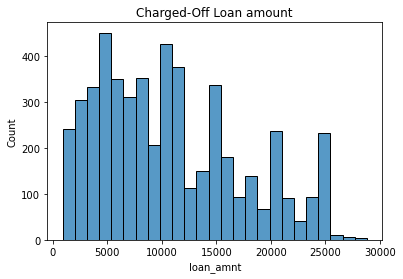

10000    349
12000    293
5000     285
15000    246
25000    222
        ... 
2875       1
1275       1
20375      1
12175      1
3175       1
Name: loan_amnt, Length: 446, dtype: int64

In [279]:
# Distribution of Loan Amount among Charged-off category
s = sns.histplot(chargedOffLoanDF["loan_amnt"])
s.set_title("Charged-Off Loan amount")
plt.show()

chargedOffLoanDF["loan_amnt"].value_counts(ascending=False)

# Observation
# Most of the charged-off loans are within loan amount 25000
# There are spikes for loan amount like 5000, 10000, 12000, 15000 etc as people generally take loan of rounded amount

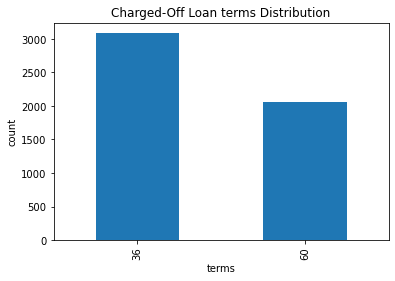

In [280]:
# Distribution of term among Charged-off category
chargedOffLoanDF["term"].value_counts().plot.bar()
plt.xlabel("terms")
plt.ylabel("count")
plt.title("Charged-Off Loan terms Distribution")
plt.show()

# Observation
# The "term" do not have much influence on Charged-off loans

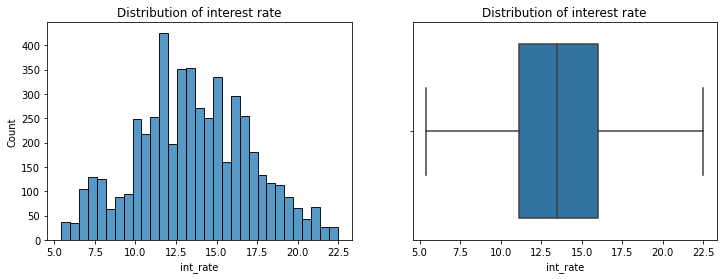

In [281]:
# Distribution of Interest Rate among Charged-off category
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
sns.histplot(chargedOffLoanDF["int_rate"])
plt.title("Distribution of interest rate")
plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="int_rate")
plt.title("Distribution of interest rate")
plt.show()

# Observation
# Majority of Interest Rate falls between 11% - 16% for an charged-off Loan

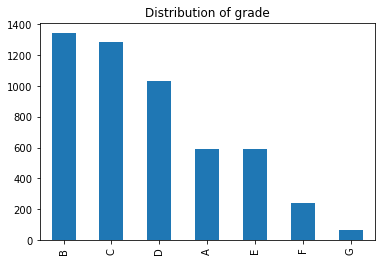

In [282]:
# Distribution of Grade among Charged-off category
chargedOffLoanDF["grade"].value_counts().plot.bar()
plt.title("Distribution of grade")
plt.show()

# Observation
# customers with grade B, C and D are likely to default

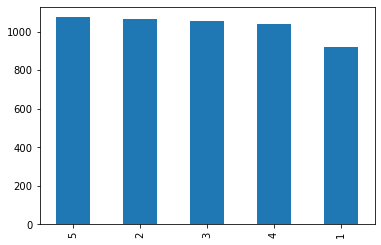

In [283]:
# Distribution of Sub-Grade among Charged-off category
chargedOffLoanDF["sub_grade"].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.show()

# Observation
# customers with sub-grade of B, C and D are likely to default

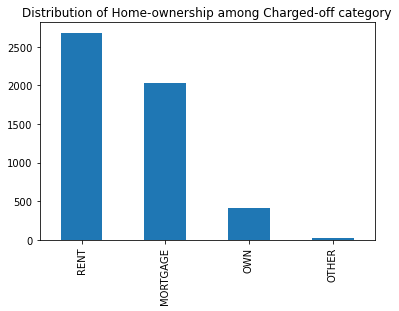

In [284]:
# Distribution of Home-ownership among Charged-off category
chargedOffLoanDF["home_ownership"].value_counts().plot.bar()
plt.title("Distribution of Home-ownership among Charged-off category")
plt.show()

# Observation
# People with Rented or Mortgage house are likely to default

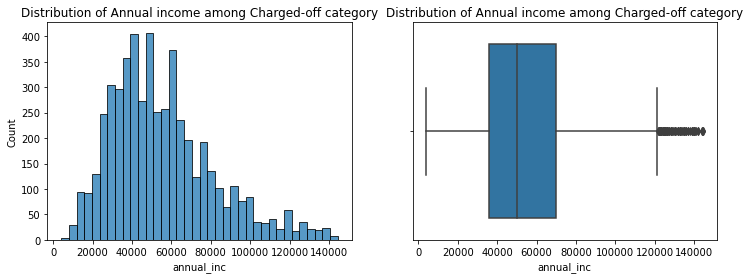

Range of annual income of charged-off people is between -15000.0 - 121000.0


In [285]:
# Distribution of Annual income among Charged-off category

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
sns.histplot(chargedOffLoanDF["annual_inc"])
plt.title("Distribution of Annual income among Charged-off category")
plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="annual_inc")
plt.title("Distribution of Annual income among Charged-off category")
plt.show()

IQR = chargedOffLoanDF["annual_inc"].quantile(0.75) - chargedOffLoanDF["annual_inc"].quantile(0.25)
max = chargedOffLoanDF["annual_inc"].quantile(0.75) + 1.5 * IQR
min = chargedOffLoanDF["annual_inc"].quantile(0.25) - 1.5 * IQR

print("Range of annual income of charged-off people is between {} - {}".format(min, max))

# Observation 
# Almost all charged_off loans have annual income b/w 35K - 70k

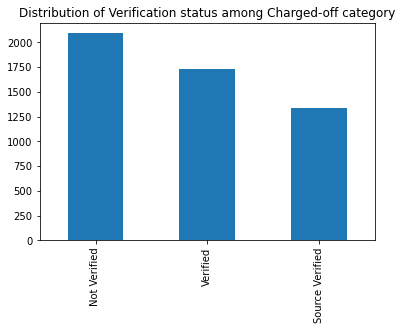

In [286]:
# Distribution of Verification status among Charged-off category

chargedOffLoanDF["verification_status"].value_counts().plot.bar()
plt.title("Distribution of Verification status among Charged-off category")
plt.show()

# Observation
# Not Verified loans tends to default

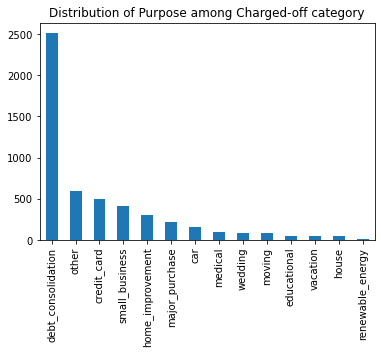

In [287]:
# Distribution of Purpose among Charged-off category

chargedOffLoanDF["purpose"].value_counts().plot.bar()
plt.title("Distribution of Purpose among Charged-off category")
plt.show()

# Observation
# People taking loan with 'Debt-consolidation' perpose are likely to default

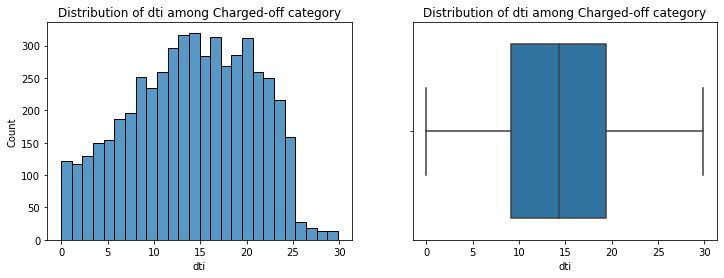

In [288]:
# Distribution of dti among Charged-off category

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
sns.histplot(chargedOffLoanDF["dti"])
plt.title("Distribution of dti among Charged-off category")


plt.subplot(1,2,2)
sns.boxplot(data=chargedOffLoanDF, x="dti")
plt.title("Distribution of dti among Charged-off category")

plt.show()

# Observation
# people with dti between 10-20 are likely to default

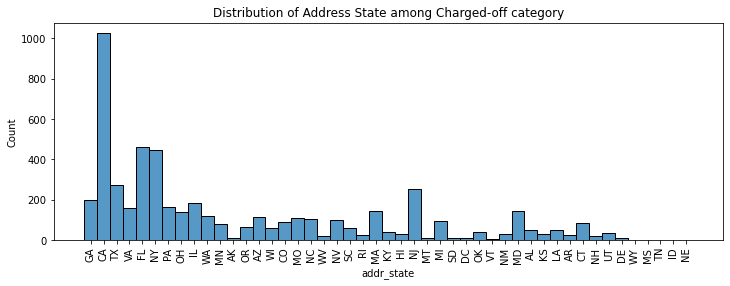

In [289]:
# Distribution of Address State among Charged-off category
plt.figure(figsize=[12,4])
sns.histplot(chargedOffLoanDF["addr_state"])
plt.xticks(rotation=90)
plt.title("Distribution of Address State among Charged-off category")
plt.show()

# Observation
# people living in CA are likely to default

### Now lets see how the distribution of certain categorical variable is in the overall/fully paid dataset compared to charged-off

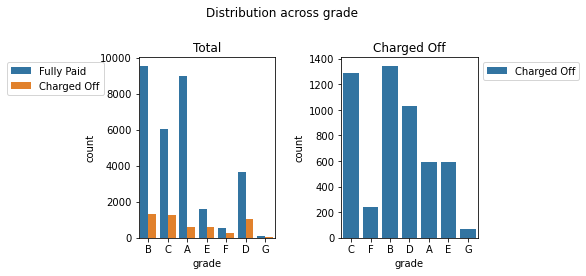

In [290]:
# Distribution across grade
fig, axs = plt.subplots(1,2)
fig.suptitle("Distribution across grade")
sns.countplot(LoanDf["grade"],hue=LoanDf["loan_status"], ax = axs[0])
sns.countplot(chargedOffLoanDF["grade"],hue=chargedOffLoanDF["loan_status"], ax = axs[1])
fig.tight_layout(pad=2.0)
axs[0].title.set_text("Total")
axs[1].title.set_text("Charged Off")
axs[0].legend(bbox_to_anchor=(-1, 1), loc=2)
axs[1].legend(bbox_to_anchor=(1, 1), loc=2)
fig.show()

# Grade B borrowers tends to default more but D,E,F,G have more ratio of defaulters

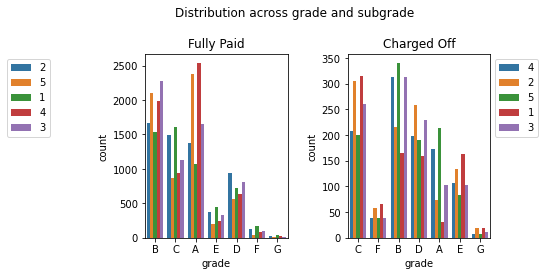

In [291]:
# Distribution across grade and subgrade
fig, axs = plt.subplots(1,2)
fig.suptitle("Distribution across grade and subgrade")
sns.countplot(PaidLoanDF["grade"],hue=PaidLoanDF["sub_grade"], ax = axs[0])
sns.countplot(chargedOffLoanDF["grade"],hue=chargedOffLoanDF["sub_grade"], ax = axs[1])
fig.tight_layout(pad=2.0)
axs[0].title.set_text("Fully Paid")
axs[1].title.set_text("Charged Off")
axs[0].legend(bbox_to_anchor=(-1, 1), loc=2)
axs[1].legend(bbox_to_anchor=(1, 1), loc=2)
fig.show()

# More number of defaulters are from B5 but groups D2,E1,F1,F2,G1,G2 have more ratio of defaulters

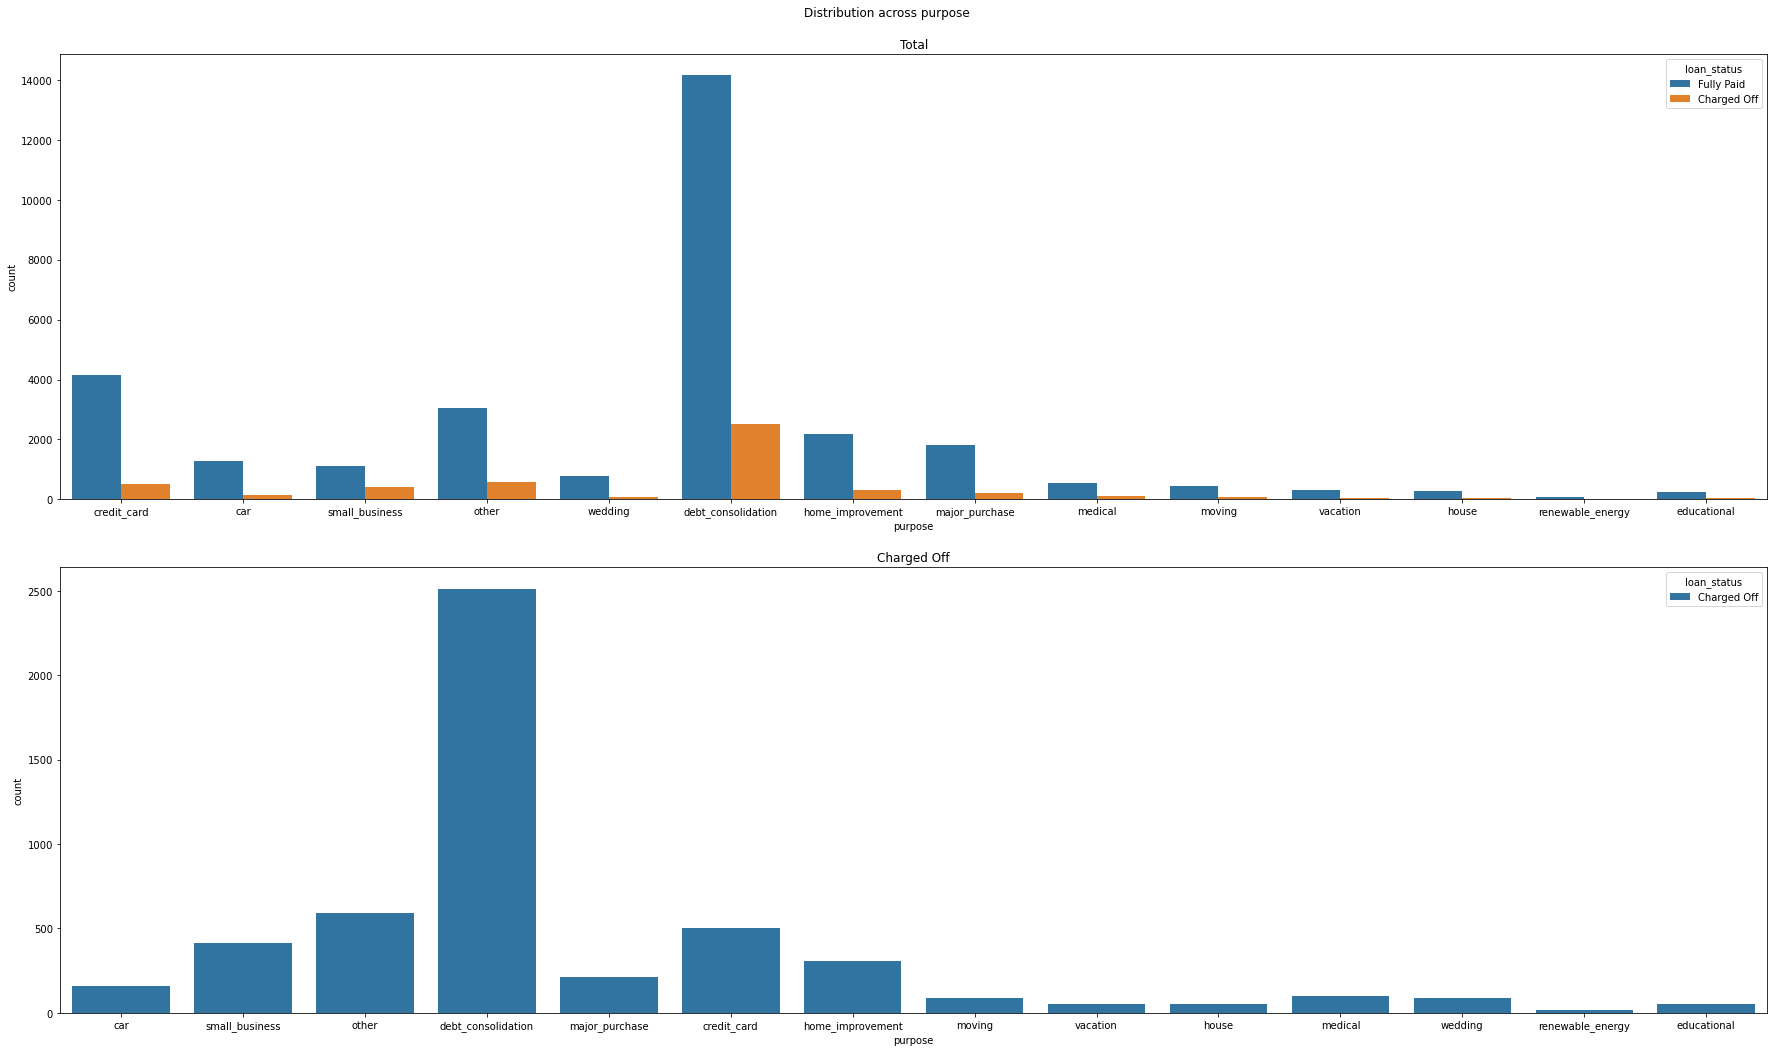

In [292]:
# Distribution across purpose
fig, axs = plt.subplots(2,figsize=(25,15))
fig.suptitle("Distribution across purpose")
sns.countplot(LoanDf["purpose"],hue=LoanDf["loan_status"], ax = axs[0])
sns.countplot(chargedOffLoanDF["purpose"],hue=chargedOffLoanDF["loan_status"], ax = axs[1])
axs[0].title.set_text("Total")
axs[1].title.set_text("Charged Off")
fig.tight_layout(pad=2.0)
#axs[1].legend(bbox_to_anchor=(1, 1), loc=2)
fig.show()

### Multivariate Analysis

##### Distribution with annual_inc and purpose
##### For this we have to use annual_inc_binned, then a pivot table is created with value as count of borrowers accros categories and a heat map is ploted


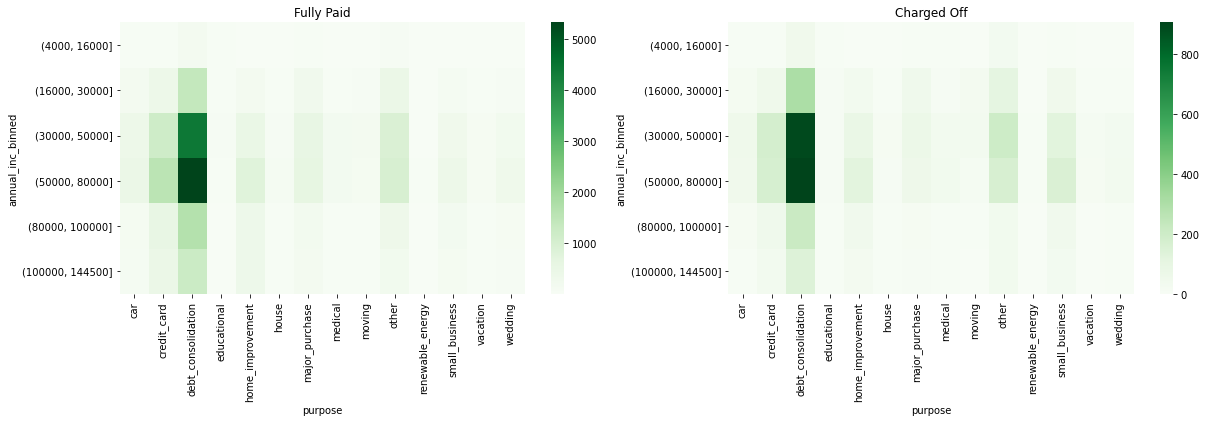

In [293]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

pivotDf = PaidLoanDF[["annual_inc_binned","purpose","int_rate"]].pivot_table(index=["annual_inc_binned"],columns=["purpose"],aggfunc='count')
arr =[]
for i in range(0,14):
    arr.append(pivotDf.columns[i][1])
pivotDf.columns = [arr]
s = sns.heatmap(pivotDf,cmap="Greens",ax=ax[0])
s.set_xlabel("purpose")
s.set_title("Fully Paid")

pivotDf = pd.pivot_table(data=chargedOffLoanDF,index=["annual_inc_binned"],columns=["purpose"],values=["int_rate"],aggfunc='count')
arr =[]
for i in range(0,14):
    arr.append(pivotDf.columns[i][1])
pivotDf.columns = [arr]
s = sns.heatmap(pivotDf,cmap="Greens",ax=ax[1])
s.set_xlabel("purpose")
s.set_title("Charged Off")
plt.show()

#Observation

# Borrowers with an annual inc of 30k-50k,50k-80k request loan for debt consolidation a lot 
# and thereby the no of defaulters are also more here

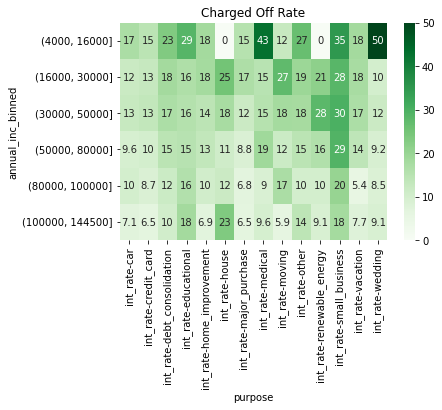

In [294]:
# Here we will find the rate of defaulters based on annual inc and purpose
pivotDf_paid = PaidLoanDF[["annual_inc_binned","purpose","int_rate"]].pivot_table(index=["annual_inc_binned"],columns=["purpose"],aggfunc='count')
pivotDf_default = pd.pivot_table(data=chargedOffLoanDF,index=["annual_inc_binned"],columns=["purpose"],values=["int_rate"],aggfunc='count')
pivotDf_rate = (pivotDf_default/(pivotDf_paid + pivotDf_default)*100).round(2)
s = sns.heatmap(pivotDf_rate,cmap="Greens",annot=True)
s.set_xlabel("purpose")
s.set_title("Charged Off Rate")
plt.show()

#Observations

# What we can see here is that borrowers with annual inc less than 80K who request loan for small business 
# have more 30% defaulters
# We can also observe such high rates in following combinations as well:
# Educational - 4k-16k\
# Renewable energy - 30k-50k\
# Using this information it is possible to set a min limit to annual inc to provide the loan

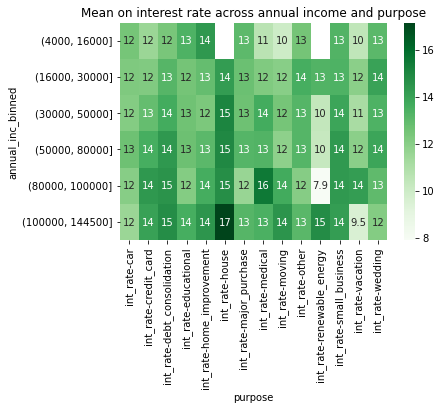

In [295]:
# With mean interest rate
pivotDf_int_rate_mean = pd.pivot_table(data=chargedOffLoanDF,index=["annual_inc_binned"],columns=["purpose"],values=["int_rate"],aggfunc='mean')
s = sns.heatmap(pivotDf_int_rate_mean,cmap="Greens",annot=True)
s.set_xlabel("purpose")
s.set_title("Mean on interest rate across annual income and purpose")
plt.show()

# Observation
# The reason for 23% defaulters in category annual inc 100k-145k 
# and purpose house, is due to the high interest rate

##### Distribution with funded_amnt_inv and purpose
##### For this we have use the funded_amnt_inv_binned, then a pivot table is created with value as count of borrows accros categories and a heat map is ploted

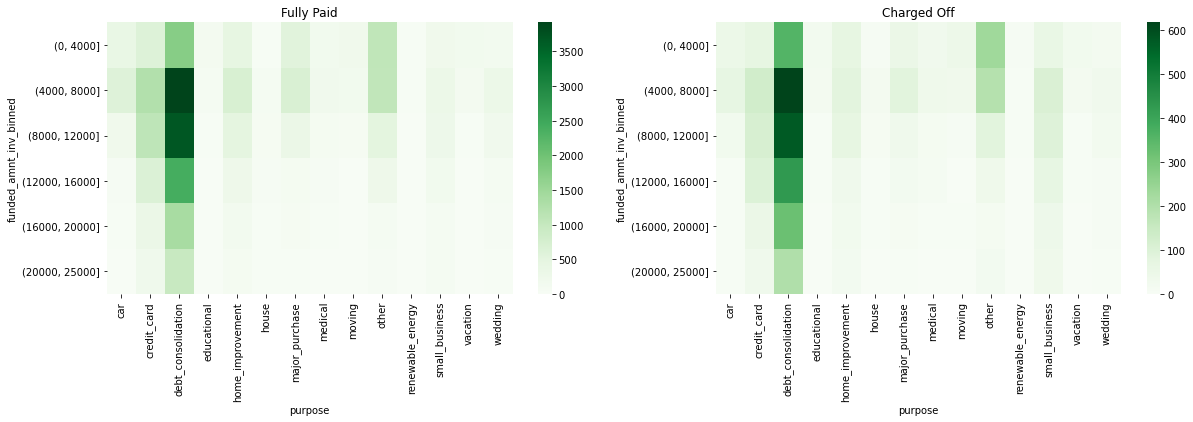

In [296]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

pivotDf = PaidLoanDF[["funded_amnt_inv_binned","purpose","int_rate"]].pivot_table(index=["funded_amnt_inv_binned"],columns=["purpose"],aggfunc='count')
arr =[]
for i in range(0,14):
    arr.append(pivotDf.columns[i][1])
pivotDf.columns = [arr]
s = sns.heatmap(pivotDf,cmap="Greens",ax=ax[0])
s.set_xlabel("purpose")
s.set_title("Fully Paid")

pivotDf = pd.pivot_table(data=chargedOffLoanDF,index=["funded_amnt_inv_binned"],columns=["purpose"],values=["int_rate"],aggfunc='count')
arr =[]
for i in range(0,14):
    arr.append(pivotDf.columns[i][1])
pivotDf.columns = [arr]
s = sns.heatmap(pivotDf,cmap="Greens",ax=ax[1])
s.set_xlabel("purpose")
s.set_title("Charged Off")
plt.show()

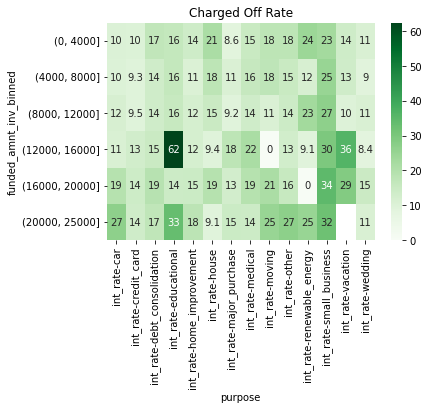

In [297]:
pivotDf_paid = PaidLoanDF[["funded_amnt_inv_binned","purpose","int_rate"]].pivot_table(index=["funded_amnt_inv_binned"],columns=["purpose"],aggfunc='count')
pivotDf_default = pd.pivot_table(data=chargedOffLoanDF,index=["funded_amnt_inv_binned"],columns=["purpose"],values=["int_rate"],aggfunc='count')
pivotDf_rate = (pivotDf_default/(pivotDf_paid + pivotDf_default)*100).round(2)
s = sns.heatmap(pivotDf_rate,cmap="Greens",annot=True)
s.set_xlabel("purpose")
s.set_title("Charged Off Rate")
plt.show()

#Observation
# Its risky to provide high funds greater than 12k for educational,small business,vacation purposes 
# as the rate of defauters are more here

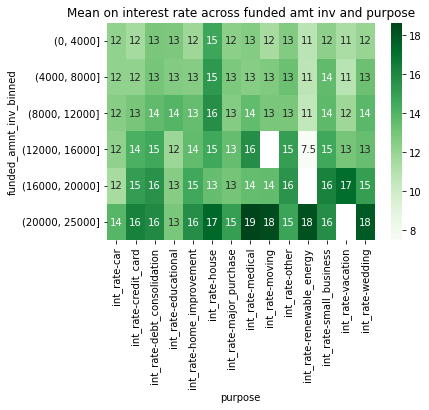

In [298]:
# With mean interest rate
pivotDf_int_rate_mean = pd.pivot_table(data=chargedOffLoanDF,index=["funded_amnt_inv_binned"],columns=["purpose"],values=["int_rate"],aggfunc='mean')
s = sns.heatmap(pivotDf_int_rate_mean,cmap="Greens",annot=True)
s.set_xlabel("purpose")
s.set_title("Mean on interest rate across funded amt inv and purpose")
plt.show()

#Observation
# Funded amt b/w 20K - 25K has an average interest rate of 18,19 for the purpose medical and moving, 
# even with higher interest rate the percentage of defaulters are less compared to other purpose 
# like small business, reducing the interest could have a positive impact here